In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['font.family'] = 'AppleGothic' #malgun Gothic


from google.colab import files     #colab 돌릴때
uploaded = files.upload()          #colab 돌릴때

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

  


Found GPU at: /device:GPU:0
Tue May 31 12:49:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W /  70W |    264MiB / 15109MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                            

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.446617223999965
GPU (s):
0.0477577569999994
GPU speedup over CPU: 51x


In [4]:
red = pd.read_csv("winequality-red.csv", sep=';')             # 구분자가 콤마, 가 아닌....  세미콜론;임
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
import glob      # 묶어주는 라이브러리
import os        # 폴더를 컨트롤

In [6]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [7]:
all_data = []     # 모든 데이터를 저장하기 위해 빈리스트를 만들어둠

i=0

for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type']=i
    all_data.append(data)
    i+=1         # 타입을 확인함.   레드는 0, 화이트는 1로 정의하여 와인 구분함.
    
wine = pd.concat(all_data, ignore_index=True)      # 데이터를 합침concat, concat은 axis가 기본값이   0임,  
                                                    #기존인데스를 가지고 와서 6천여개중 4900여개로 표시됨, 그래서 기존 인데스 무시처리

In [8]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


> **우리의 목표: 와인성분데이터를 넣으면 와인의 품질을 예측하는 모형

In [10]:
sorted(wine.quality.unique())             # 목표 변수

[3, 4, 5, 6, 7, 8, 9]

In [11]:
wine.quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [12]:
wine[wine.quality ==9]                   # 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### 탐색적분석  ------------------------
- 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [13]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [14]:
red_quality = wine.loc[wine.type == 0, 'quality']


In [15]:
white_quality = wine.loc[wine.type==1, 'quality']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


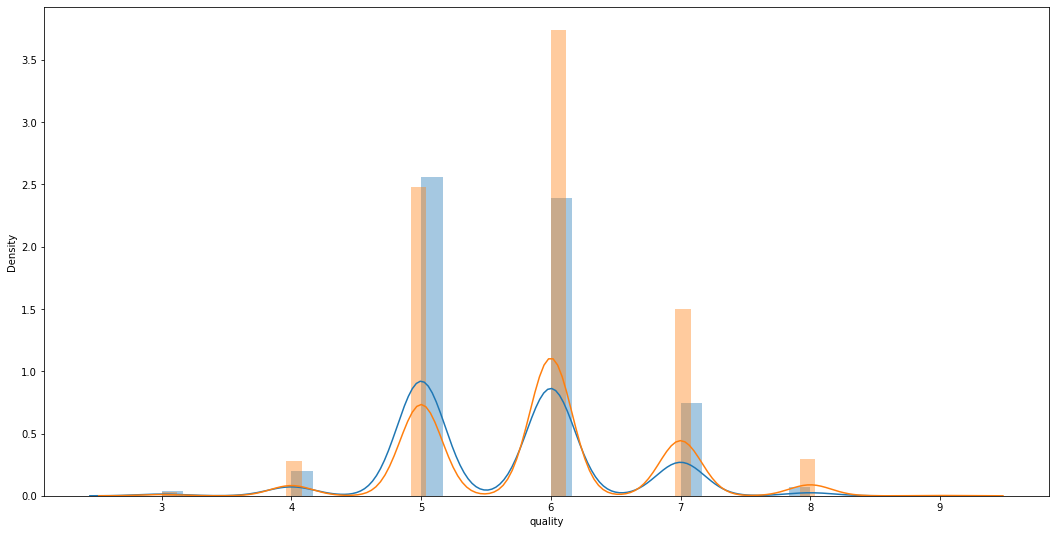

In [16]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label="White")

### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위함
- p value < 0.05     그래야 유의미한 의미임 95%  ******

In [17]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [19]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


### 상관관계분석

In [20]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


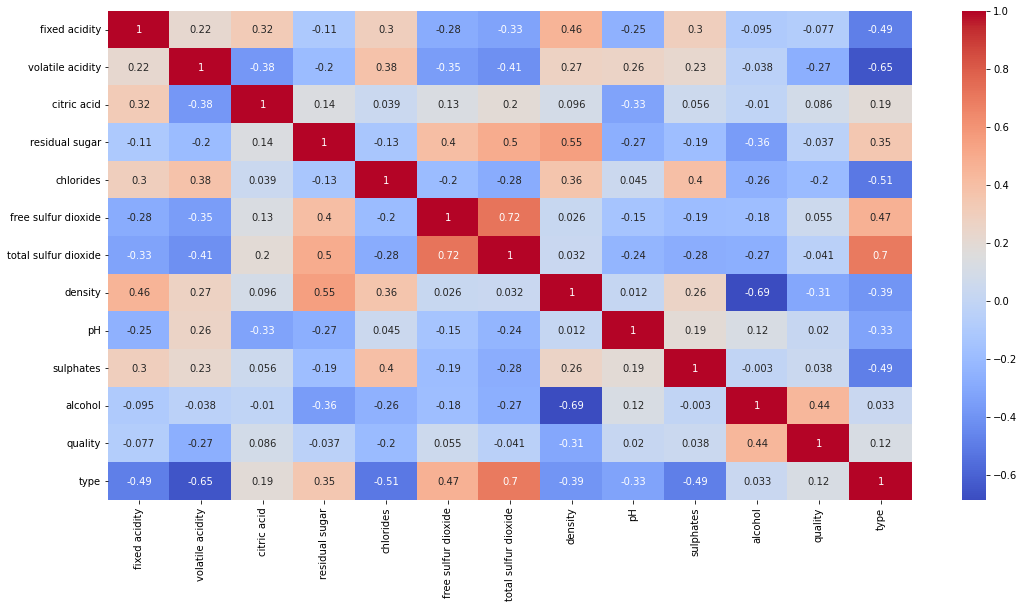

In [21]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [22]:
#너무 상관관계가 높은 아이들끼리는 같이 쓰지말고 둘중 하나를 쓰는게 좋음 공분산도가 높아짐

In [23]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

### 산점도 pairplot
- 모든 회귀문제는 산점도가 있어야 파악이 용이
- 하지만 모든 점을 산점도를 그리면   성능문제발생,   그래서 샘플링을 하여 산점도로 변수간 관계를 만듦

In [24]:
def sampling(data, n=300):         #와인 샘플링
    return data.loc[np.random.choice(data.index, size=n, replace=False)]        #choice  인덱스 골라냄,  replace 중복미허용F

In [25]:
red = wine[wine.type ==0]
white = wine[wine.type ==1]

In [26]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
197,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,6,0
120,7.3,1.07,0.09,1.7,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5,0
862,7.5,0.42,0.32,2.7,0.067,7.0,25.0,0.99628,3.24,0.44,10.4,5,0
459,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6,0


In [27]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3134,8.5,0.15,0.49,1.50,0.031,17.0,122.0,0.99320,3.03,0.40,10.3,6,1
2041,6.0,0.25,0.28,2.20,0.026,54.0,126.0,0.98980,3.43,0.65,12.9,8,1
5338,7.0,0.15,0.28,14.70,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7,1
2976,6.9,0.28,0.41,1.70,0.050,10.0,136.0,0.99300,3.16,0.71,11.4,6,1
1864,6.9,0.29,0.40,19.45,0.043,36.0,156.0,0.99960,2.93,0.47,8.9,5,1


In [28]:
wine_sample = pd.concat([red_sample, white_sample])

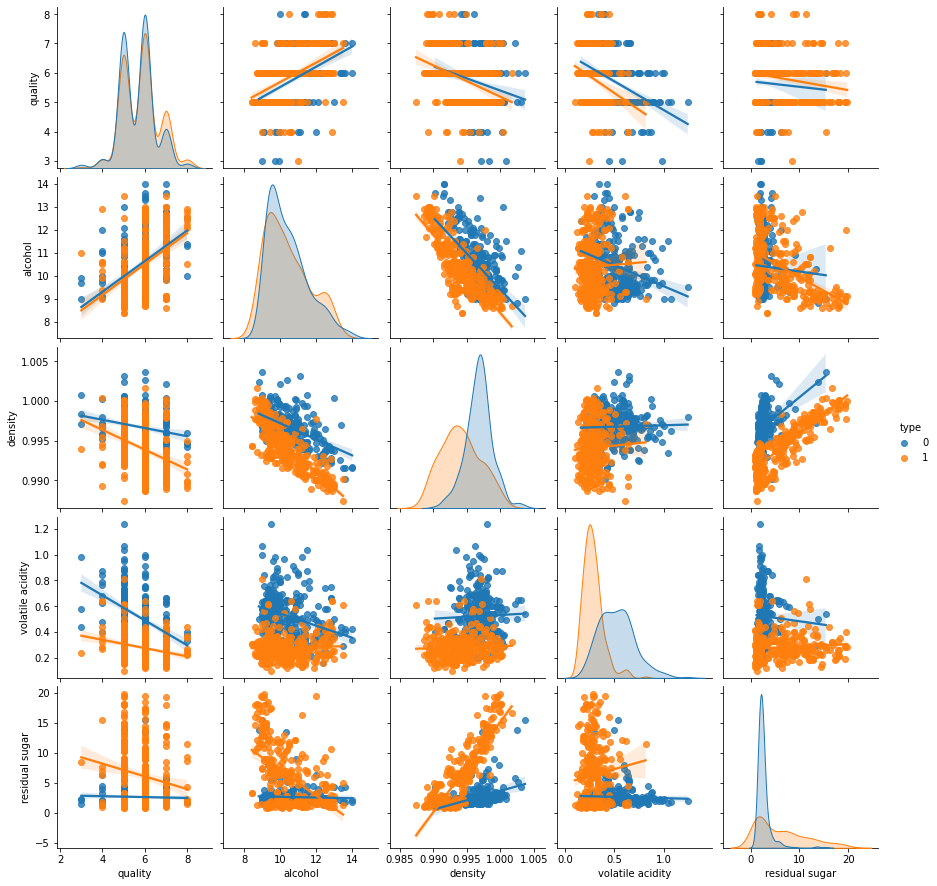

In [29]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

### .
- 선형회귀모형  만들기

In [30]:
wine.columns = wine.columns.str.replace(' ','_')

In [31]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [32]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']                              #예측모델을 만들기 위해 핏쳐 셀렉션을 함

In [33]:
# features_B = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type']

In [34]:
# features_C = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density']

In [35]:
# features_D = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity']

In [36]:
# features_E = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides']

In [37]:
# features_F = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide']

In [38]:
# features_G = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH']

In [39]:
# features_H = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates']

In [40]:
y = wine.quality
X = wine[wine.columns.difference(['quality', 'type'])]
X_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [41]:
X = wine_standard[features]
# X_B = wine_standard[features_B]
# X_C = wine_standard[features_C]
# X_D = wine_standard[features_D]
# X_E = wine_standard[features_E]
# X_F = wine_standard[features_F]
# X_G = wine_standard[features_G]
# X_H = wine_standard[features_H]

# 훈련데이터셋과 테스트데이터셋으로 나누자
### 회귀분석의 경우는.... 훈련데이터셋과 테스트 데이터 셋을 나누어야 함

In [42]:
from sklearn.model_selection import train_test_split                   #머신러닝 라이브러리는 사이킷런에 있음

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.quality, train_size=0.8, random_state=31)

# X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, wine.quality, train_size=0.8, random_state=31)
# X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, wine.quality, train_size=0.8, random_state=31)
# X_D_train, X_D_test, y_D_train, y_D_test = train_test_split(X_D, wine.quality, train_size=0.8, random_state=31)
# X_E_train, X_E_test, y_E_train, y_E_test = train_test_split(X_E, wine.quality, train_size=0.8, random_state=31)
# X_F_train, X_F_test, y_F_train, y_F_test = train_test_split(X_F, wine.quality, train_size=0.8, random_state=31)
# X_G_train, X_G_test, y_G_train, y_G_test = train_test_split(X_G, wine.quality, train_size=0.8, random_state=31)
# X_H_train, X_H_test, y_H_train, y_H_test = train_test_split(X_H, wine.quality, train_size=0.8, random_state=31)


In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [45]:
# print(X_B_train.shape)
# print(X_B_test.shape)
# print(y_B_train.shape)
# print(y_B_test.shape)

In [46]:
# 모델정의


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
# model_B = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# model_B.fit(X_B_train, y_B_train)

In [52]:
# prediction = model.predict(X_test)

In [53]:
# prediction_B = model_B.predict(X_B_test)

In [54]:
# prediction

array([5.60905571, 5.62501168, 6.17583394, ..., 5.29490736, 6.05439488,
       5.41107896])

In [55]:
# prediction_B

### 모델평가

In [56]:
from sklearn import metrics

In [57]:
# metrics.mean_absolute_error(y_test, prediction)

0.5526961889267856

In [58]:
# metrics.mean_absolute_error(y_B_test, prediction_B)

In [59]:
# metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.4884991903691603

In [60]:
# metrics.mean_squared_error(y_B_test, prediction_B)   

### 하단 개인작업구간

### 숫자를 떨어뜨려라  (과제)
- 1. 그전에 핏쳐의 셀렉션과 조합, 핏처 엔지니어링... 등
- 2. 하이퍼 파라메터 수정해가며 수정
- 3. 랜덤포레스트 이용.

> **metrics.mean_squared_error(y_test, prediction)   오류율 낮추기 

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [62]:
pd.set_option('display.max_rows', 30)

In [63]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = 10, 
#                                   max_features =0.9,
#                                   random_state=31)

In [64]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

In [65]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10).mean()

In [67]:
from tqdm import tqdm

hyper_result =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

n_estimators = [550]           #100~900    3,6,9 중 5와 6이 가장높음

for c in tqdm(n_estimators):
    for i in tqdm(range(60)):
        a = np.random.randint(40,90)           # features에 따라 달라지기는 하지만 대체적으로 depth가 높을 수 록 오류율이 감소하는 경향
        b = np.random.uniform(0.3,1.0)
        
        model = RandomForestRegressor(n_estimators = c, 
                                    max_depth = a, 
                                    max_features =b,
                                    min_samples_split=3,
                                    min_samples_leaf=1,
                                    random_state=31)

        score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25).mean()    #5~100중 22정도가 시간상 가장 괜찮게 나옴

        hyper_result.append({'점수' : score,
                            'n_estimators' : c,
                            'MAX_depth': a,
                            'MAX_features': b})
                

        print("현재 스코어는 {0:.5f}".format(score))


  2%|▏         | 1/60 [02:29<2:27:20, 149.83s/it]

현재 스코어는 -0.37166



  3%|▎         | 2/60 [07:13<3:41:12, 228.84s/it]

현재 스코어는 -0.37908



  5%|▌         | 3/60 [11:02<3:37:13, 228.66s/it]

현재 스코어는 -0.37638



  7%|▋         | 4/60 [13:02<2:53:32, 185.93s/it]

현재 스코어는 -0.37100



  8%|▊         | 5/60 [15:58<2:47:07, 182.32s/it]

현재 스코어는 -0.37318



 10%|█         | 6/60 [18:54<2:42:01, 180.03s/it]

현재 스코어는 -0.37318



 12%|█▏        | 7/60 [23:11<3:01:09, 205.09s/it]

현재 스코어는 -0.37672



 13%|█▎        | 8/60 [27:31<3:12:59, 222.69s/it]

현재 스코어는 -0.37672



 15%|█▌        | 9/60 [29:56<2:48:32, 198.29s/it]

현재 스코어는 -0.37166



 17%|█▋        | 10/60 [31:52<2:24:05, 172.90s/it]

현재 스코어는 -0.37100



 18%|█▊        | 11/60 [36:29<2:47:14, 204.79s/it]

현재 스코어는 -0.37908



 20%|██        | 12/60 [40:42<2:55:41, 219.62s/it]

현재 스코어는 -0.37672



 22%|██▏       | 13/60 [44:25<2:52:42, 220.49s/it]

현재 스코어는 -0.37638



 23%|██▎       | 14/60 [48:32<2:55:16, 228.62s/it]

현재 스코어는 -0.37672



 25%|██▌       | 15/60 [50:33<2:27:06, 196.15s/it]

현재 스코어는 -0.37100



 27%|██▋       | 16/60 [52:31<2:06:32, 172.56s/it]

현재 스코어는 -0.37100



 28%|██▊       | 17/60 [54:53<1:57:11, 163.52s/it]

현재 스코어는 -0.37166



 30%|███       | 18/60 [57:40<1:55:13, 164.60s/it]

현재 스코어는 -0.37318



 32%|███▏      | 19/60 [1:00:59<1:59:28, 174.83s/it]

현재 스코어는 -0.37424



 33%|███▎      | 20/60 [1:03:56<1:57:01, 175.55s/it]

현재 스코어는 -0.37318



 35%|███▌      | 21/60 [1:05:58<1:43:31, 159.28s/it]

현재 스코어는 -0.37100



 37%|███▋      | 22/60 [1:08:30<1:39:32, 157.16s/it]

현재 스코어는 -0.37166



 38%|███▊      | 23/60 [1:12:37<1:53:28, 184.01s/it]

현재 스코어는 -0.37672



 40%|████      | 24/60 [1:17:13<2:07:02, 211.75s/it]

현재 스코어는 -0.37908



 42%|████▏     | 25/60 [1:20:07<1:56:53, 200.38s/it]

현재 스코어는 -0.37318



 43%|████▎     | 26/60 [1:22:30<1:43:52, 183.31s/it]

현재 스코어는 -0.37166



 45%|████▌     | 27/60 [1:27:05<1:55:56, 210.79s/it]

현재 스코어는 -0.37908



 47%|████▋     | 28/60 [1:29:33<1:42:21, 191.92s/it]

현재 스코어는 -0.37166



 48%|████▊     | 29/60 [1:34:10<1:52:18, 217.39s/it]

현재 스코어는 -0.37908



 50%|█████     | 30/60 [1:36:07<1:33:40, 187.34s/it]

현재 스코어는 -0.37100



 52%|█████▏    | 31/60 [1:38:29<1:23:54, 173.60s/it]

현재 스코어는 -0.37166



 53%|█████▎    | 32/60 [1:43:06<1:35:32, 204.71s/it]

현재 스코어는 -0.37908



 55%|█████▌    | 33/60 [1:45:31<1:24:00, 186.67s/it]

현재 스코어는 -0.37166



 57%|█████▋    | 34/60 [1:48:47<1:22:11, 189.68s/it]

현재 스코어는 -0.37424



 58%|█████▊    | 35/60 [1:53:22<1:29:36, 215.04s/it]

현재 스코어는 -0.37908



 60%|██████    | 36/60 [1:57:59<1:33:27, 233.65s/it]

현재 스코어는 -0.37908



 62%|██████▏   | 37/60 [2:00:51<1:22:28, 215.16s/it]

현재 스코어는 -0.37318



 63%|██████▎   | 38/60 [2:03:41<1:13:55, 201.62s/it]

현재 스코어는 -0.37318



 65%|██████▌   | 39/60 [2:06:30<1:07:11, 191.97s/it]

현재 스코어는 -0.37318



 67%|██████▋   | 40/60 [2:09:49<1:04:41, 194.06s/it]

현재 스코어는 -0.37424



 68%|██████▊   | 41/60 [2:12:17<57:03, 180.18s/it]  

현재 스코어는 -0.37166



 70%|███████   | 42/60 [2:16:00<57:55, 193.10s/it]

현재 스코어는 -0.37638



 72%|███████▏  | 43/60 [2:19:17<55:00, 194.16s/it]

현재 스코어는 -0.37424



 73%|███████▎  | 44/60 [2:21:42<47:53, 179.61s/it]

현재 스코어는 -0.37166



 75%|███████▌  | 45/60 [2:26:17<52:03, 208.25s/it]

현재 스코어는 -0.37908



 77%|███████▋  | 46/60 [2:29:38<48:02, 205.88s/it]

현재 스코어는 -0.37424



 78%|███████▊  | 47/60 [2:32:54<43:59, 203.06s/it]

현재 스코어는 -0.37424



 80%|████████  | 48/60 [2:36:37<41:46, 208.89s/it]

현재 스코어는 -0.37638



 82%|████████▏ | 49/60 [2:39:25<36:02, 196.63s/it]

현재 스코어는 -0.37318



 83%|████████▎ | 50/60 [2:43:36<35:31, 213.11s/it]

현재 스코어는 -0.37672



 85%|████████▌ | 51/60 [2:46:54<31:15, 208.42s/it]

현재 스코어는 -0.37424



 87%|████████▋ | 52/60 [2:49:17<25:11, 188.96s/it]

현재 스코어는 -0.37166



 88%|████████▊ | 53/60 [2:51:42<20:30, 175.76s/it]

현재 스코어는 -0.37166



 90%|█████████ | 54/60 [2:53:40<15:49, 158.30s/it]

현재 스코어는 -0.37100



 92%|█████████▏| 55/60 [2:56:36<13:37, 163.55s/it]

현재 스코어는 -0.37318



 93%|█████████▎| 56/60 [2:59:56<11:38, 174.67s/it]

현재 스코어는 -0.37424



 95%|█████████▌| 57/60 [3:02:25<08:20, 166.77s/it]

현재 스코어는 -0.37166



 97%|█████████▋| 58/60 [3:05:44<05:53, 176.57s/it]

현재 스코어는 -0.37424



 98%|█████████▊| 59/60 [3:10:19<03:26, 206.21s/it]

현재 스코어는 -0.37908



100%|██████████| 1/1 [3:13:33<00:00, 11613.72s/it]

현재 스코어는 -0.37424


In [68]:
pd.set_option('display.max_row', 20)

pd.DataFrame(hyper_result).head(20).sort_values(by='점수', ascending=False) 

,점수,n_estimators,MAX_depth,MAX_features
3,-0.370999,550,55,0.329714
15,-0.370999,550,48,0.319215
14,-0.370999,550,83,0.363824
9,-0.370999,550,56,0.358029
0,-0.371662,550,52,0.432750
8,-0.371662,550,59,0.457202
16,-0.371662,550,47,0.411739
17,-0.373178,550,54,0.522046
19,-0.373178,550,55,0.550917
5,-0.373178,550,61,0.511585


In [69]:
print("최소에러율")
print(pd.DataFrame(hyper_result)['점수'].max())
# print(pd.DataFrame(hyper_result_B)['점수'].max())
# print(pd.DataFrame(hyper_result_C)['점수'].max())
# print(pd.DataFrame(hyper_result_D)['점수'].max())
# print(pd.DataFrame(hyper_result_E)['점수'].max())
# print(pd.DataFrame(hyper_result_F)['점수'].max())
# print(pd.DataFrame(hyper_result_G)['점수'].max())
# print(pd.DataFrame(hyper_result_H)['점수'].max())

print(" ")
print("평균에러율")
print(pd.DataFrame(hyper_result)['점수'].mean())
# print(pd.DataFrame(hyper_result_B)['점수'].mean())
# print(pd.DataFrame(hyper_result_C)['점수'].mean())
# print(pd.DataFrame(hyper_result_D)['점수'].mean())
# print(pd.DataFrame(hyper_result_E)['점수'].mean())
# print(pd.DataFrame(hyper_result_F)['점수'].mean())
# print(pd.DataFrame(hyper_result_G)['점수'].mean())
# print(pd.DataFrame(hyper_result_H)['점수'].mean())

최소에러율
-0.37099942910848677
 
평균에러율
-0.3743242444136595


In [70]:
# 최종 모델정의

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [72]:
Finalmodel = RandomForestRegressor()
# Finalmodel_B = RandomForestRegressor()
# Finalmodel_C = RandomForestRegressor()
# Finalmodel_D = RandomForestRegressor()
# Finalmodel_E = RandomForestRegressor()
# Finalmodel_F = RandomForestRegressor()
# Finalmodel_G = RandomForestRegressor()
# Finalmodel_H = RandomForestRegressor()

In [73]:
Finalmodel.fit(X_train, y_train)
# Finalmodel_B.fit(X_B_train, y_B_train)
# Finalmodel_C.fit(X_C_train, y_C_train)
# Finalmodel_D.fit(X_D_train, y_D_train)
# Finalmodel_E.fit(X_E_train, y_E_train)
# Finalmodel_F.fit(X_F_train, y_F_train)
# Finalmodel_G.fit(X_G_train, y_G_train)
# Finalmodel_H.fit(X_H_train, y_H_train)


RandomForestRegressor()

In [74]:
prediction = Finalmodel.predict(X_test)

In [75]:
# prediction_B = Finalmodel_B.predict(X_B_test)
# prediction_C = Finalmodel_C.predict(X_C_test)
# prediction_D = Finalmodel_D.predict(X_D_test)
# prediction_E = Finalmodel_E.predict(X_E_test)
# prediction_F = Finalmodel_F.predict(X_F_test)
# prediction_G = Finalmodel_G.predict(X_G_test)
# prediction_H = Finalmodel_H.predict(X_H_test)

In [76]:
prediction

array([5.97, 5.3 , 6.87, ..., 5.81, 6.39, 5.42])

In [77]:
# prediction_B

In [78]:
# prediction_C

In [79]:
# prediction_D

In [80]:
# prediction_E

In [81]:
# prediction_F

In [82]:
# prediction_G

In [83]:
# prediction_H

### 모델평가

In [84]:
from sklearn import metrics

In [85]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.3581473076923077

In [86]:
# metrics.mean_squared_error(y_B_test, prediction_B)   

In [87]:
# metrics.mean_squared_error(y_B_test, prediction_B) 

In [88]:
# metrics.mean_squared_error(y_C_test, prediction_C) 

In [89]:
# metrics.mean_squared_error(y_D_test, prediction_D) 

In [90]:
# metrics.mean_squared_error(y_E_test, prediction_E) 

In [91]:
# metrics.mean_squared_error(y_F_test, prediction_F) 

In [92]:
# metrics.mean_squared_error(y_G_test, prediction_G) 

In [93]:
# metrics.mean_squared_error(y_H_test, prediction_H)          # 가장 낮은 오류율로 H모델 사용이 현재로써는 가장 유효함

### 상단 개인작업구간

In [94]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'   #이꼴 표시이나 물결로 함

In [95]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

#코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [96]:
from statsmodels.formula.api import ols       #statsmodel:   모든 통계 공식이 들어있음.   ols:최소제곱법

In [97]:
formula_model = ols(formula, data=wine).fit()          #

In [98]:
formula_model.summary()                                #R-squared는  설명력을 갖추었 다는 것

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     418.9
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        16:11:24   Log-Likelihood:                -7274.5
No. Observations:                6497   AIC:                         1.456e+04
Df Residuals:                    6490   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           36.3297      8.509      4.270      0.000      19.649      53.010
alcohol              0.3114      0.013     24.164      0.000       0.286       0.337
density            -33.1933      8.446     -3.930      0.000     -49.750     -16.637
residual_sugar       0.0353      0.004      9.082      0.000       0.028       0.043
type                -0.4592      0.047     -9.847      0.000      -0.551      -0.368
volatile_acidity    -1.7047      0.074    -23.005      0.000      -1.850      -1.559
chlorides           -0.5035      0.321     -1.569      0.117      -1.133       0.126
==============================================================================
Omnibus:                      113.796   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.104
Skew:                           0.032   Prob(JB):                     1.78e-50
Kurtosis:                       3.918   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
#density  -33에 대한 확인
wine.head()
#0.9978    이렇게 단위차이의 격차가 너무 차이남. 그래서 단위기준을 맞추어 주어야 함. 표준화

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### ** 독립변수의 표준화
- 종속변수는 절대로 표준화를 하면 안됨

In [100]:
formula_model = ols(formula, data=wine_standard).fit()

In [101]:
formula_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     418.9
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        16:11:25   Log-Likelihood:                -7274.5
No. Observations:                6497   AIC:                         1.456e+04
Df Residuals:                    6490   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.1646      0.036    169.618      0.000       6.093       6.236
alcohol              0.3714      0.015     24.164      0.000       0.341       0.402
density             -0.0995      0.025     -3.930      0.000      -0.149      -0.050
residual_sugar       0.1679      0.018      9.082      0.000       0.132       0.204
type                -0.4592      0.047     -9.847      0.000      -0.551      -0.368
volatile_acidity    -0.2807      0.012    -23.005      0.000      -0.305      -0.257
chlorides           -0.0176      0.011     -1.569      0.117      -0.040       0.004
==============================================================================
Omnibus:                      113.796   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.104
Skew:                           0.032   Prob(JB):                     1.78e-50
Kurtosis:                       3.918   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
formula_all_model = ols(formula_all, data=wine_standard).fit()

In [103]:
formula_all_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        16:11:25   Log-Likelihood:                -7195.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6485   BIC:                         1.450e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.0939      0.044    139.896      0.000       6.009       6.179
fixed_acidity            0.1069      0.020      5.351      0.000       0.068       0.146
volatile_acidity        -0.2422      0.013    -19.180      0.000      -0.267      -0.217
residual_sugar           0.2977      0.028     10.548      0.000       0.242       0.353
chlorides               -0.0281      0.012     -2.428      0.015      -0.051      -0.005
free_sulfur_dioxide      0.0877      0.014      6.449      0.000       0.061       0.114
total_sulfur_dioxide    -0.0806      0.018     -4.428      0.000      -0.116      -0.045
density                 -0.3136      0.043     -7.307      0.000      -0.398      -0.229
pH                       0.0811      0.015      5.587      0.000       0.053       0.110
sulphates                0.1069      0.011      9.439      0.000       0.085       0.129
alcohol                  0.2635      0.021     12.315      0.000       0.222       0.305
type                    -0.3655      0.057     -6.468      0.000      -0.476      -0.255
==============================================================================
Omnibus:                      140.952   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.758
Skew:                           0.017   Prob(JB):                     7.38e-69
Kurtosis:                       4.076   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""